### Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

In [2]:
# Load data from file
df = pd.read_csv('data/df_model_final.csv')

In [3]:
# Browse dataset
df.head(10)

,uid,label,freq_P_last_1,freq_P_last_3,freq_P_last_7,freq_P_last_14,freq_P_last_30,freq_D_last_1,freq_D_last_3,freq_D_last_7,freq_D_last_14,freq_D_last_30,freq_S_last_1,freq_S_last_3,freq_S_last_7,freq_S_last_14,freq_S_last_30,device_type
0,141858867,1,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,2
1,157309586,1,0,0,0,0,5,0,0,0,0,0,0,0,0,0,1,2
2,162228038,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
3,166397219,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2
4,167587246,0,0,0,0,169,514,4,5,6,9,21,6,7,21,37,75,2
5,167595851,0,0,0,0,26,115,0,0,0,2,6,0,0,0,6,13,2
6,167596545,1,0,0,0,0,42,0,0,0,0,0,0,0,0,0,0,2
7,167598791,1,0,0,0,0,95,0,0,0,0,0,0,0,0,0,0,2
8,167617438,1,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,2
9,167628321,1,0,0,0,0,28,0,0,0,0,3,0,0,0,0,3,2


In [4]:
# Show summary stats
df.describe()

,uid,label,freq_P_last_1,freq_P_last_3,freq_P_last_7,freq_P_last_14,freq_P_last_30,freq_D_last_1,freq_D_last_3,freq_D_last_7,freq_D_last_14,freq_D_last_30,freq_S_last_1,freq_S_last_3,freq_S_last_7,freq_S_last_14,freq_S_last_30,device_type
count,5.708800e+04,57088.000000,57088.0,57088.0,57088.0,57088.000000,57088.000000,57088.000000,57088.000000,57088.000000,57088.000000,57088.000000,57088.000000,57088.000000,57088.000000,57088.000000,57088.000000,57088.000000
mean,1.674593e+08,0.759056,0.0,0.0,0.0,26.282038,119.113982,0.162994,0.388365,0.895600,1.992941,9.352141,0.135685,0.341175,1.144093,2.885563,10.680213,1.871549
std,9.946829e+06,0.427660,0.0,0.0,0.0,79.114173,241.497945,7.546603,8.722732,11.851486,18.877847,53.234604,1.494883,2.483628,6.072377,11.136599,27.191000,0.334803
min,8.643550e+05,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.680432e+08,1.000000,0.0,0.0,0.0,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1.685014e+08,1.000000,0.0,0.0,0.0,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,1.687779e+08,1.000000,0.0,0.0,0.0,14.000000,121.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,10.000000,2.000000
max,1.692587e+08,1.000000,0.0,0.0,0.0,2713.000000,3058.000000,1493.000000,1493.000000,1493.000000,1556.000000,5919.000000,218.000000,305.000000,574.000000,631.000000,1504.000000,2.000000


In [5]:
df['device_type_1'] = (df['device_type'] == 1).astype(int)
df['device_type_2'] = (df['device_type'] == 2).astype(int)

### Define Features and Target

In [6]:
selected_features = list(df.columns.values)

In [7]:
selected_features.remove('uid')
selected_features.remove('label')
selected_features.remove('device_type')
selected_features

['freq_P_last_1',
 'freq_P_last_3',
 'freq_P_last_7',
 'freq_P_last_14',
 'freq_P_last_30',
 'freq_D_last_1',
 'freq_D_last_3',
 'freq_D_last_7',
 'freq_D_last_14',
 'freq_D_last_30',
 'freq_S_last_1',
 'freq_S_last_3',
 'freq_S_last_7',
 'freq_S_last_14',
 'freq_S_last_30',
 'device_type_1',
 'device_type_2']

In [8]:
X = df[selected_features]
y = df['label']

In [9]:
X.shape

(57088, 17)

In [10]:
y[:10]

0    1
1    1
2    1
3    1
4    0
5    0
6    1
7    1
8    1
9    1
Name: label, dtype: int64

#### Let's Train-test split the data!

In [11]:
# import train test split function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Train model using sklearn

In [12]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)


### Calculate the metric scores for the model

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [14]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [15]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

### Logistic Regression

              train      test
metrics                      
AUC        0.836248  0.837429
Accuracy   0.813422  0.816518
Precision  0.819524  0.822875
Recall     0.966783  0.967860
f1-score   0.887084  0.889498


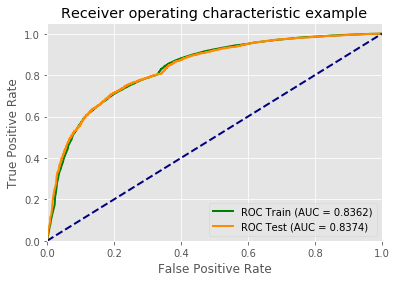

In [16]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(C=1.0, penalty='l2')
# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Random Forest

              train      test
metrics                      
AUC        0.899968  0.875521
Accuracy   0.860236  0.842267
Precision  0.884149  0.875068
Recall     0.938621  0.925390
f1-score   0.910571  0.899526


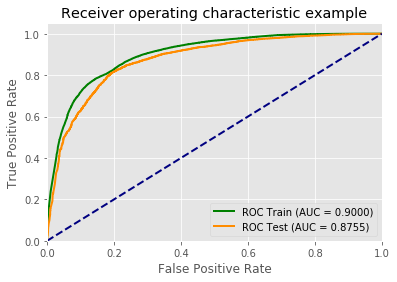

In [17]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier


parameters = {'n_estimators': 77,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 30,
              'min_samples_split': 2,
              'min_samples_leaf': 15,
              'random_state': 0,
              'n_jobs': -1
              }

clf = RandomForestClassifier(**parameters)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

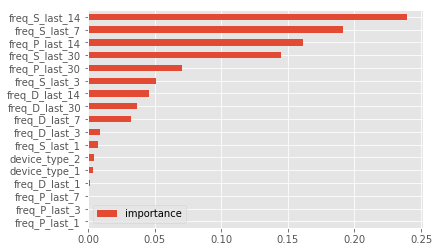

In [18]:
df_feature_importance = pd.DataFrame()
df_feature_importance['feature'] = selected_features
df_feature_importance['importance'] = clf.feature_importances_
df_feature_importance.sort_values('importance',inplace=True)

ax = df_feature_importance.plot.barh()
t = np.arange(len(df_feature_importance['feature']))
ax.set_yticks(t)
ax.set_yticklabels(df_feature_importance['feature'])
plt.show()

### Gradient Boosting Trees

              train      test
metrics                      
AUC        0.879923  0.877806
Accuracy   0.847843  0.843843
Precision  0.876900  0.875474
Recall     0.929811  0.927227
f1-score   0.902581  0.900608


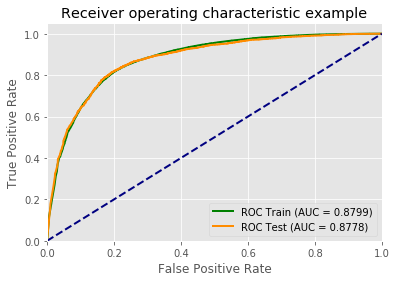

In [19]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier


parameters = {
    'n_estimators': 50,
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.5,
    'max_features':0.6,
    'random_state': 42
}

clf = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Neural Network

              train      test
metrics                      
AUC        0.866289  0.866728
Accuracy   0.834903  0.837362
Precision  0.868459  0.871948
Recall     0.921839  0.922291
f1-score   0.894353  0.896413


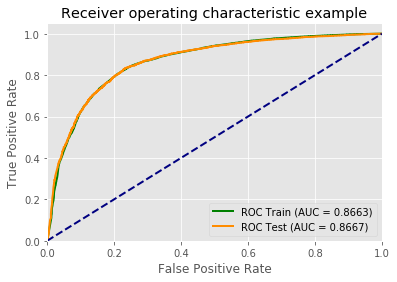

In [20]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
from sklearn.neural_network import MLPClassifier


parameters = {
    'solver':'adam', 
    'activation':'relu',
    'alpha':1e-5, #increase alpha->increase penalty :: http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py
    'hidden_layer_sizes':(15,10), 
    'learning_rate':'adaptive',
    'random_state':1
    }
clf = MLPClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### HyperParameter Tuning: Grid Search

#### RandomForestClassifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV


clf = RandomForestClassifier()

param_grid = {'n_estimators': [100,150,200,250], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25,30], 
              'min_samples_split': [2,3,4],
              'min_samples_leaf': [2,5,10,20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.893260  0.876677
Accuracy   0.854237  0.843142
Precision  0.879842  0.874716
Recall     0.935473  0.927227
f1-score   0.906805  0.900206


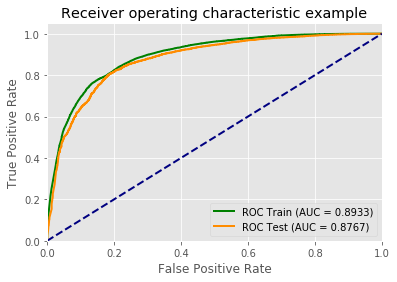

In [ ]:
# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

#### Gradient Boosting Trees

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

clf = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50,100,150,200,250],
    'max_depth': [5,10,15,20,25,30],
    'learning_rate': [0.05,0.1,0.2],
    'subsample': [0.3,0.5,0.7],
    'max_features':[0.4,0.5,0.6,0.7],
    'random_state': [42,45]
}
acc_scorer = make_scorer(roc_auc_score)
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

In [ ]:
# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)